# Exercise 6

## 1. a)

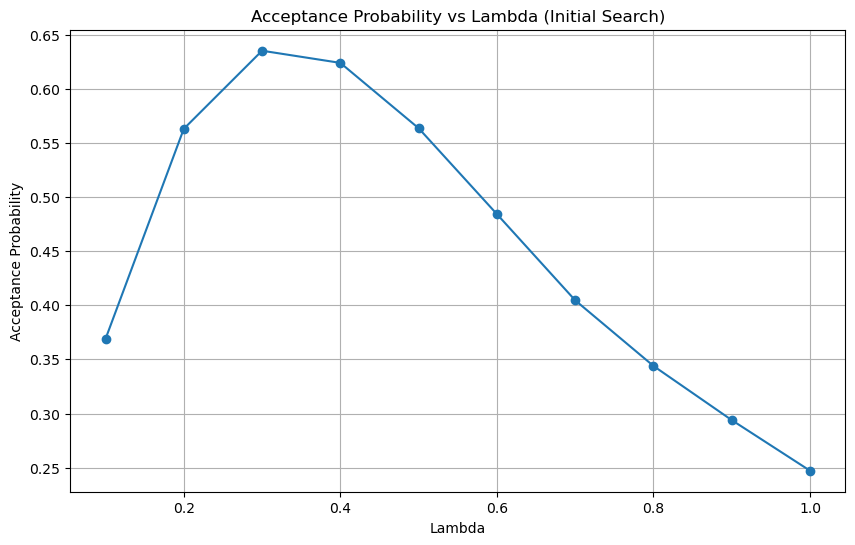

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

def acceptance_ratio(x, y, lambda_):
    R = (y**2)/(x**2) * np.exp((1 - lambda_) * (x - y))
    return R

def metropolis_hastings(lambda_, num_iterations=100000):
    x = 1.0  # Initial value
    accepted = 0
    for i in range(num_iterations):
        y = np.random.exponential(1 / lambda_)  # Sample from Exp(lambda_)
        R = acceptance_ratio(x, y, lambda_)
        alpha = min(1, R)
        u = np.random.uniform(0, 1)
        if u < alpha:
            x = y
            accepted += 1
        else:
            pass  # x remains the same
    acceptance_probability = accepted / num_iterations
    return acceptance_probability

#initial coarse search over lambda values
lambda_values = np.arange(0.1, 1.1, 0.1)
acceptance_probabilities = []

for lambda_ in lambda_values:
    acc_prob = metropolis_hastings(lambda_)
    acceptance_probabilities.append(acc_prob)

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, acceptance_probabilities, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Acceptance Probability')
plt.title('Acceptance Probability vs Lambda (Initial Search)')
plt.grid(True)
plt.show()

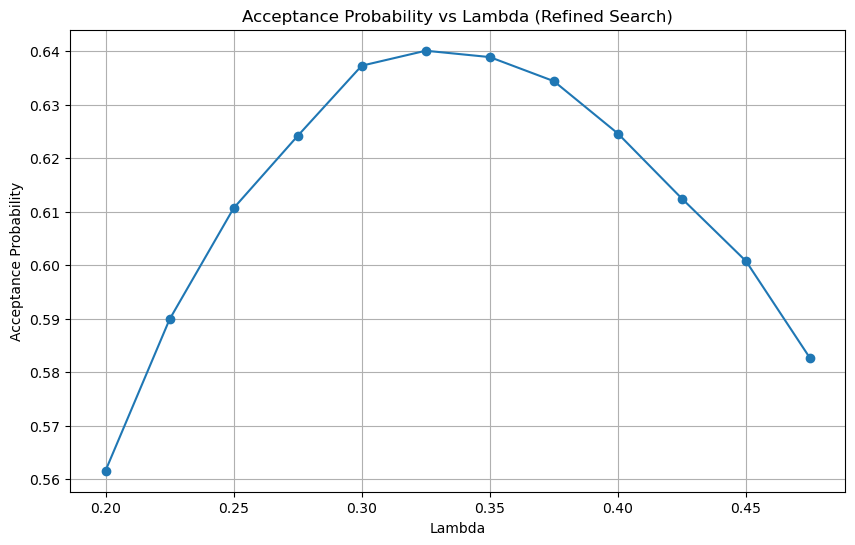

In [21]:
#refine the search around lambda = 0.3 with smaller steps
lambda_values_fine = np.arange(0.2, 0.5, 0.025)
acceptance_probabilities_fine = []

for lambda_ in lambda_values_fine:
    acc_prob = metropolis_hastings(lambda_)
    acceptance_probabilities_fine.append(acc_prob)

plt.figure(figsize=(10, 6))
plt.plot(lambda_values_fine, acceptance_probabilities_fine, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Acceptance Probability')
plt.title('Acceptance Probability vs Lambda (Refined Search)')
plt.grid(True)
plt.show()

The optimal value of $\lambda$ is approximately 0.325 +-0.05. 

## 1. b)

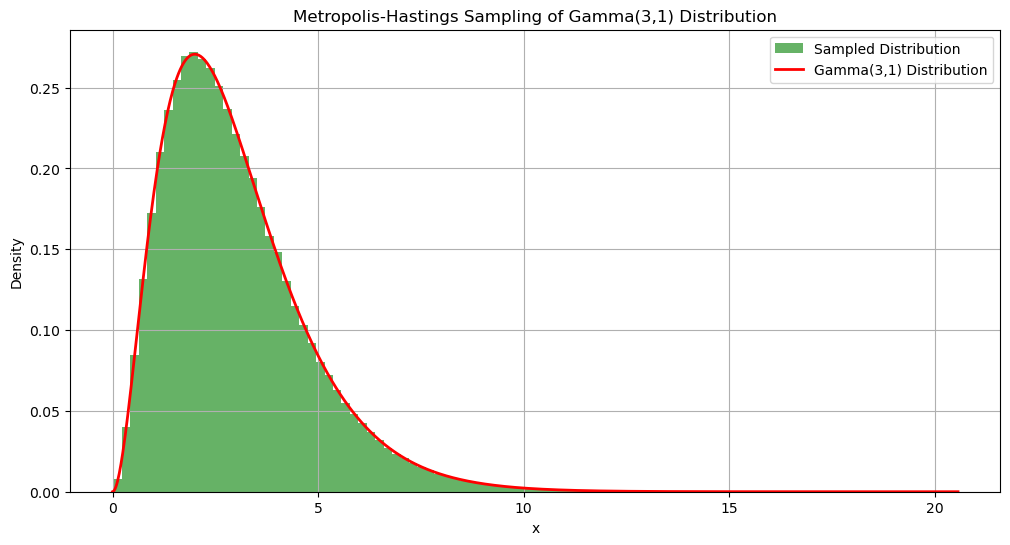

In [22]:
def metropolis_hastings_sampling(lambda_, num_samples=1000000):
    x = 1.0  # Initial value
    samples = []
    accepted = 0
    for i in range(num_samples):
        y = np.random.exponential(1 / lambda_)  # Sample from Exp(lambda_)
        R = acceptance_ratio(x, y, lambda_)
        alpha = min(1, R)
        u = np.random.uniform(0, 1)
        if u < alpha:
            x = y
            accepted += 1
        samples.append(x)
    acceptance_probability = accepted / num_samples
    return samples, acceptance_probability

lambda_opt = 0.325

samples, acceptance_prob = metropolis_hastings_sampling(lambda_opt)

plt.figure(figsize=(12, 6))

count, bins, ignored = plt.hist(samples, bins=100, density=True, alpha=0.6, color='g', label='Sampled Distribution')

#theoretical gamma distribution
x = np.linspace(0, max(samples), 1000)
theoretical_pdf = gamma.pdf(x, a=3, scale=1)

plt.plot(x, theoretical_pdf, 'r', lw=2, label='Gamma(3,1) Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Metropolis-Hastings Sampling of Gamma(3,1) Distribution')
plt.legend()
plt.grid(True)
plt.show()

## 1. c)

In [23]:
lambda_opt = 0.325

samples, acceptance_prob = metropolis_hastings_sampling(lambda_opt)

sample_mean = np.mean(samples)
sample_variance = np.var(samples)

#theoretical mean and variance of Gamma(3,1)
theoretical_mean = 3 / 1  # alpha / beta
theoretical_variance = 3 / (1**2)  # alpha / beta^2

print(f'Sample Mean: {sample_mean:.4f}')
print(f'Sample Variance: {sample_variance:.4f}')
print(f'Theoretical Mean: {theoretical_mean}')
print(f'Theoretical Variance: {theoretical_variance}')

Sample Mean: 3.0008
Sample Variance: 3.0051
Theoretical Mean: 3.0
Theoretical Variance: 3.0


## 1. d)

Metropolis-Hastings requires less information and is more generally applicable because it only needs the unnormalized target density, whereas the Gibbs sampler requires explicit knowledge of the full conditional distributions.